In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
data=pd.read_csv('Heart_Disease_Prediction.csv')

In [8]:
data.columns = ['Age','Sex','Chest_pain_type', 'Blood_pressure','Cholesterol','Fasting_blood_sugar_over_120','EKG_results',
'Max_heart_rate_achieved','Exercise_angina','ST_depression','Slope_of_ST','Number_of_vessels_fluro',
'Thallium','Heart_disease']

data['Sex']=data['Sex'].replace(to_replace=[0,1],
           value=['femal','male'])

data['Chest_pain_type']=data['Chest_pain_type'].replace(to_replace=[1,2,3,4],
           value=['TA','ATA','NAP','ASY'])

data['Heart_disease']=data['Heart_disease'].replace(to_replace=['Absence','Presence'],
           value=['No heart Disease','Heart Disease'])


In [9]:
data.describe()

,Age,Blood_pressure,Cholesterol,Fasting_blood_sugar_over_120,EKG_results,Max_heart_rate_achieved,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           270 non-null    int64  
 1   Sex                           270 non-null    object 
 2   Chest_pain_type               270 non-null    object 
 3   Blood_pressure                270 non-null    int64  
 4   Cholesterol                   270 non-null    int64  
 5   Fasting_blood_sugar_over_120  270 non-null    int64  
 6   EKG_results                   270 non-null    int64  
 7   Max_heart_rate_achieved       270 non-null    int64  
 8   Exercise_angina               270 non-null    int64  
 9   ST_depression                 270 non-null    float64
 10  Slope_of_ST                   270 non-null    int64  
 11  Number_of_vessels_fluro       270 non-null    int64  
 12  Thallium                      270 non-null    int64  
 13  Heart

In [11]:
data.shape

(270, 14)

In [12]:
data.isna().sum()

Age                             0
Sex                             0
Chest_pain_type                 0
Blood_pressure                  0
Cholesterol                     0
Fasting_blood_sugar_over_120    0
EKG_results                     0
Max_heart_rate_achieved         0
Exercise_angina                 0
ST_depression                   0
Slope_of_ST                     0
Number_of_vessels_fluro         0
Thallium                        0
Heart_disease                   0
dtype: int64

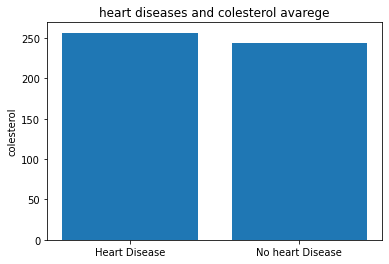

In [23]:
Cholesterol_positive=data[data['Heart_disease']=='Heart Disease']['Cholesterol'].mean()
Cholesterol_negative=data[data['Heart_disease']=='No heart Disease']['Cholesterol'].mean()
plt.bar(data['Heart_disease'].unique(),[Cholesterol_positive,Cholesterol_negative])
plt.title('heart diseases and colesterol avarege')
plt.ylabel('colesterol')
plt.show()

In [32]:
corr=data.corr()
corr

,Age,Blood_pressure,Cholesterol,Fasting_blood_sugar_over_120,EKG_results,Max_heart_rate_achieved,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium
Age,1.000000,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Blood_pressure,0.273053,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
Fasting_blood_sugar_over_120,0.123458,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG_results,0.128171,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max_heart_rate_achieved,-0.402215,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise_angina,0.098297,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST_depression,0.194234,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333
Slope_of_ST,0.159774,0.142472,-0.005755,0.044076,0.160614,-0.386847,0.255908,0.609712,1.000000,0.109498,0.283678
Number_of_vessels_fluro,0.356081,0.085697,0.126541,0.123774,0.114368,-0.265333,0.153347,0.255005,0.109498,1.000000,0.255648


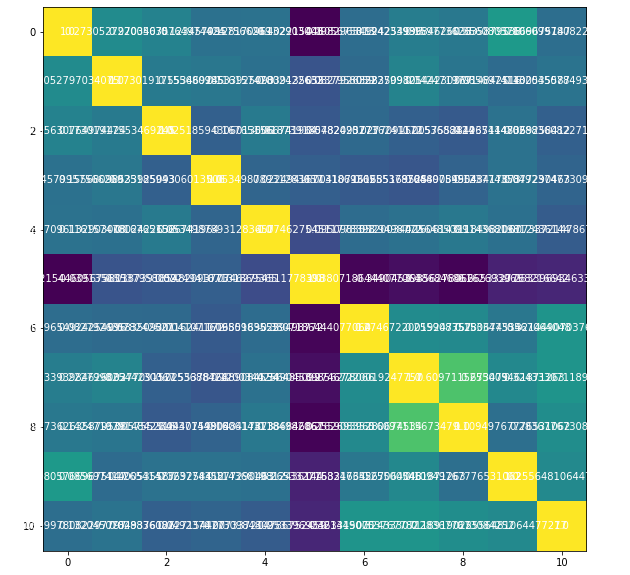

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(data.corr())

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        text = plt.text(j, i, f''corr.values[i, j],
                       ha="center", va="center", color="w")